<a href="https://colab.research.google.com/github/mosalov/personal_trajectories/blob/main/clustering_alghoritm(18.11.2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Зависимости

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [ ]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
#test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

filename = r"https://github.com/Maksimka9/klustering/blob/main/zoo2.csv?raw=true"
df = pd.read_csv(filename, index_col=0)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [ ]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_df = StandardScaler().fit_transform(df)
standart_df

array([[-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
         1.07238053, -0.65828059, -0.88975652,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263,  2.75680975,
         1.29903811, -1.27089167],
       [-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
        -0.93250481, -0.65828059,  1.12390297,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263,  2.75680975,
        -0.76980036, -1.27089167],
       [-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
        -0.93250481,  1.51910905,  1.12390297,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263,  2.75680975,
         1.29903811, -1.27089167],
       [-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
        -0.93250481,  1.51910905,  1.12390297,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263, -0.36273813,
        -0.76980036

In [ ]:
# Применяем PCA к кластеризованным данным
from sklearn.decomposition import PCA

reduced_df = PCA(n_components=2).fit_transform(standart_df) # Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df = pd.DataFrame(reduced_df) # Превращаем результаты обратно в удобный вид
reduced_df

,0,1
0,-1.783185,0.933932
1,-0.907073,2.462406
2,-1.764617,2.989749
3,-0.778783,2.329720
4,-0.907073,2.462406
5,-1.874484,2.029208
6,-1.957701,1.750620
7,-1.874484,2.029208
8,-2.032775,1.696164
9,-2.032775,1.696164


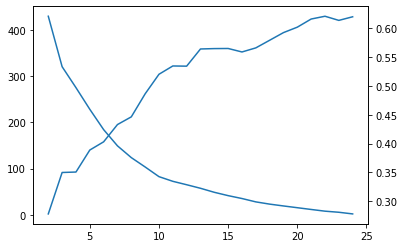

Силуэт: 22 0.6211544597311744
Инерция: 24 2.140046296296296


In [ ]:
# Посчитаем коэффициент силуэта и инерцию - метрики кластеризации, чтобы понять насколько хорошо была проведена кластеризация.

from sklearn.metrics import silhouette_score

inertia_dict = {} # Создаём словарь для значений инерции и коэффициента силуэта по каждому кластеру
silhouette_dict = {}

for k in range(2, 25):
  k_means = sklearn.cluster.KMeans(n_clusters=k, n_init=9) # Создаём экземпляр класса, где указываем количество кластеров и количество прогонов для одного значения (n_init)
  y = k_means.fit_predict(standart_df) # Вычисляем к какому элементу отнести каждый кластер
  transfer_list_inertia = {k: k_means.inertia_} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: инерция}
  transfer_list_silhouette = {k: silhouette_score(standart_df, y)} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: к-т силуэта}
  inertia_dict.update(transfer_list_inertia) # Переносим данные в главные словари
  silhouette_dict.update(transfer_list_silhouette)
  del(transfer_list_inertia) # Удаляем вспомогательные словари
  del(transfer_list_silhouette)


inertia_df = pd.DataFrame.from_dict(inertia_dict, orient='index') # Создаём pandas dataframe из словарей
silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 


figure = matplotlib.figure.Figure() # Создаём экземпляр класса Figure
axis_1 = figure.add_subplot() # Создаём вспомогательную ось графика
axis_1.plot(inertia_df) # Указываем интервал для оси
axis_2 = axis_1.twinx() # Добавляем вторую ось
axis_2.plot(silhouette_df) # Указываем интервал
display(figure) # Выводим на экран

# Выведем значение силуэта (оно максимизируется при использовании алгоритма k-средних)

print('Силуэт:', max(silhouette_dict, key=silhouette_dict.get), max(silhouette_dict.values()))

# Выведем значение инерции (оно минимизируется при использовании алгоритма k-средних)

print('Инерция:',min(inertia_dict, key=inertia_dict.get), min(inertia_dict.values()))

# silhouette_score(x,cluster.labels_)

In [ ]:
# делаем кластеризацию вручную на определенном кол-ве кластеров

kmeans = sklearn.cluster.KMeans(n_clusters = 4)
processed_df = kmeans.fit_predict(standart_df) # Вычисляем к какому элементу отнести каждый кластер
processed_df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0],
      dtype=int32)

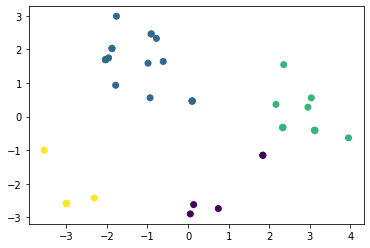

In [ ]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(reduced_df[0], reduced_df[1], c = processed_df) # с - используемые цвета
matplotlib.pyplot.show()